# Curso 1: Classificação com SKLearn

Classifica se um carro irá ser vendido a partir de suas informações, o curso possui as seguintes características:
- Análise dos dados de classificação em duas dimensões com 3 variáveis
- Normalização dos dados com StandardScaler
- utilização de um modelo de referência (Dummy)

## Instalação dos pacotes

Para garantir a funcionalidade do sistema, será instalado pacotes específicos do seaborn, graphviz e o próprio graphviz como pacote.

In [1]:
%pip install seaborn==0.13.2
%pip install graphviz==0.10
!apt-get install graphviz


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


## Carregamento do dataset

É importado do dataset, criado novas features e separado em X e Y

In [2]:
import pandas

DATA_URI = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dataframe = pandas.read_csv(DATA_URI)
dataframe.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
from datetime import datetime

dataframe['model_age'] = datetime.today().year - dataframe.model_year
dataframe['km_por_ano'] = dataframe.mileage_per_year * 1.60934
x = dataframe[["model_age", "km_por_ano", "price"]]
y = dataframe["sold"].map({ "yes": 1, "no": 0 })

## Análise exploratória dos dados

É possível analisar informações das vendas dos carros por preço e ano

<Axes: xlabel='model_age', ylabel='price'>

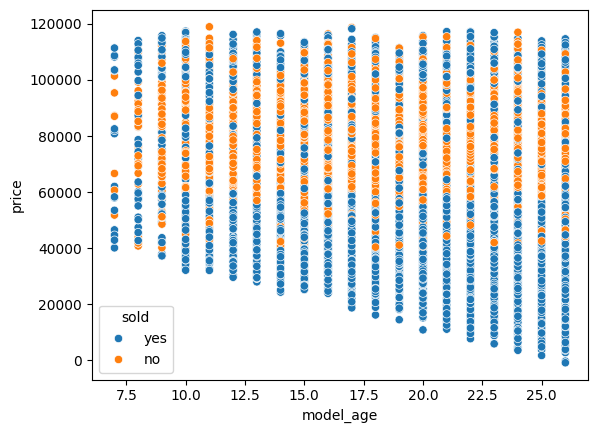

In [4]:
from seaborn import scatterplot, relplot

scatterplot(x="model_age", y="price",
            hue="sold", data=dataframe)

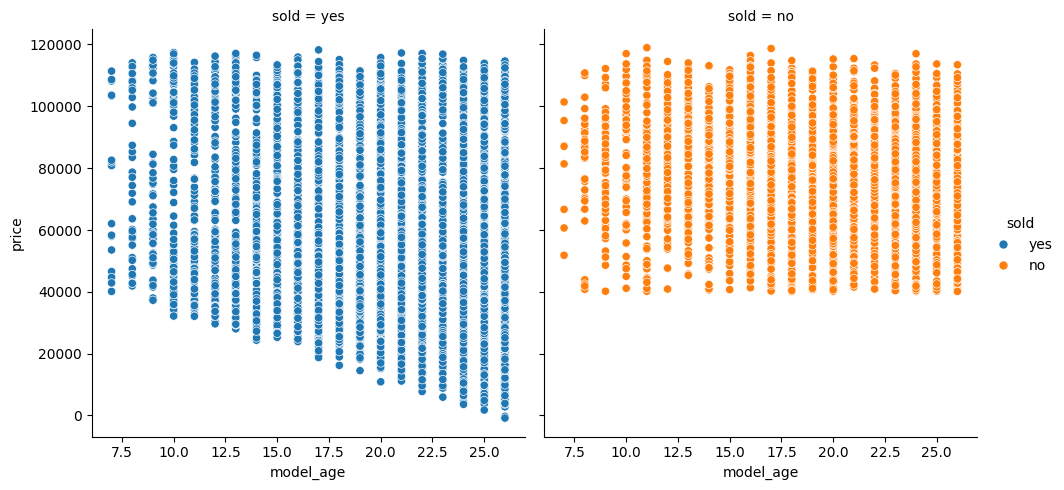

In [5]:
relplot(x="model_age", y="price", hue="sold",
        col="sold", data=dataframe)

## Separação e padronização

É realizado a separação dos dados estratificada pelo Y, de forma a os dados vão se manter iguais em relação ao Y, assim como sua padronização para que as features estejam em uma escala mais próxima.

In [6]:
from sklearn.model_selection import train_test_split

SEED = 20
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(
    x, y, random_state = SEED, test_size = 0.25, stratify = y)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

## Treinamento e teste

É obtido um modelo de referência (dummy classifier) e realizado o treino e teste da árvore de decisão. Por fim, é obtido as pontuações e exibido a árvore com as features mais relevantes

In [11]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(random_state=SEED)
dummy.fit(treino_x, treino_y)
dummy.score(teste_x, teste_y)

0.58

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(max_depth=2, random_state=SEED)
model.fit(raw_treino_x, treino_y)
predicts = model.predict(raw_teste_x)

accuracy_score(teste_y, predicts)

0.7584

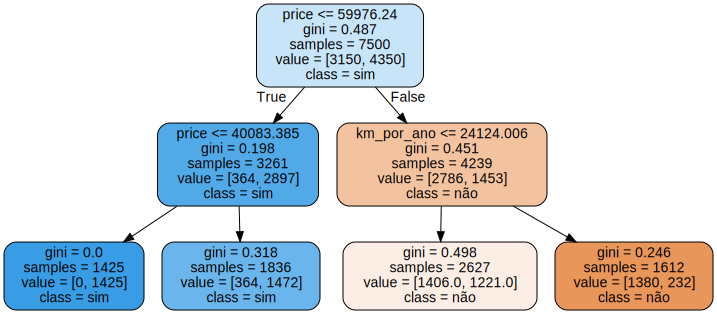

In [10]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model, out_file=None, rounded=True,
                           filled=True, feature_names=x.columns,
                           class_names=["não", "sim"])
graphviz.Source(dot_data)